In [45]:
from qiskit_finance.circuit.library import LogNormalDistribution
import numpy as np
import matplotlib.pyplot as plt
from preprocess import discretise 


In [46]:
n_qubits = 3
num_bins = 8
mu    = np.log(80)
sigma = 0.5
low, high = float(bin_edges[0]), float(bin_edges[-1])
bounds = (low,high)
samples = np.load('data/raw_log_normal.npy')
counts, bin_edges, custom_probs = discretise(samples, num_bins=num_bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

In [47]:
dist = LogNormalDistribution(num_qubits = int(np.log2(num_bins)),
                             mu=mu,
                             sigma = sigma,
                             bounds = bounds
                            )

In [48]:
qiskit_probs  = dist.probabilities
qiskit_values = dist.values


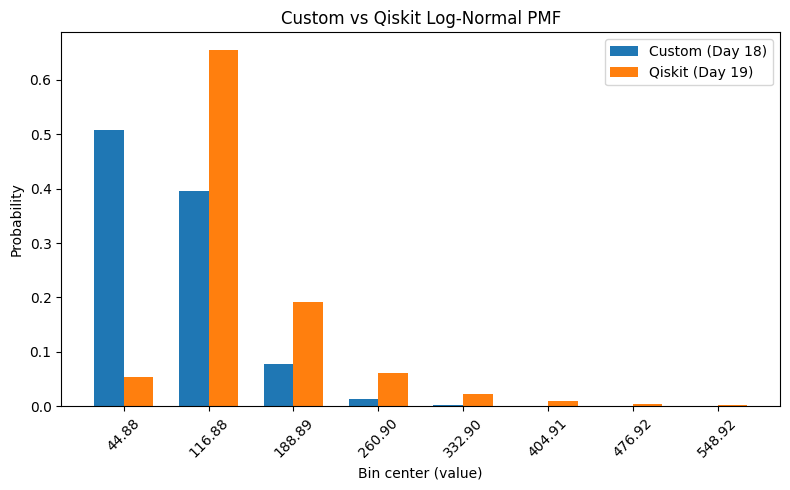

In [49]:
indices = np.arange(num_bins)
width   = 0.35
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(indices - width/2, custom_probs, width, label='Custom (Day 18)')
ax.bar(indices + width/2, qiskit_probs, width, label='Qiskit (Day 19)')

ax.set_xticks(indices)
ax.set_xticklabels([f"{v:.2f}" for v in bin_centers], rotation=45)
ax.set_xlabel('Bin center (value)')
ax.set_ylabel('Probability')
ax.set_title('Custom vs Qiskit Log-Normal PMF')
ax.legend()
plt.tight_layout()
plt.savefig('figures/day19_comparison.png')
plt.show()